Part II
---


| Var | (a, sigma^2) | n | q | k | Rule | Law |
| --- | --- | --- | --- | --- | --- | --- |
| 5 | (0;9) | 60 | 1.75 | 3 | Стерджеса | Треугольное на отрезке (-2, 4) и модой, равной 1 |


how to move for random.triagualar -> stats.triang

c = (mode - left) / (right - left)

loc = left

scale = right - left

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import pandas as pd
import math
import statistics

# consts
n = 60
a = 0
sigma = 3
q = 1.75

left = -2
right = 4
mode = 1

my_c = (mode - left)/(right-left)
my_loc = left
my_scale = right-left

Task 1


In [23]:
sample = np.random.triangular(left, mode, right, size=n)
print(sample)

[-0.85925232  1.42582716  2.37092185  0.87840044  1.66895719  2.06513337
  0.78977124 -0.72437076  0.42366213  0.3375125   0.64965068 -0.64749595
  0.87293894  2.88949509  3.00948192 -1.32889939  0.45394924  1.73968379
  0.99430928  1.99637991  2.85799056 -0.38471878  1.81900261 -0.15475448
 -0.41394908  2.7649212   1.94058247  0.77600624 -1.17917085 -1.49703119
 -0.89845212  0.69403394  1.01475561  2.29839192  0.13332793  2.54600664
  3.09520398 -1.17049638  0.55865094  1.5069203   0.67730032 -0.18864649
  0.7708015  -0.67783365  0.99212412 -0.46049001  0.44493579 -0.11182877
  0.27443295 -0.38851921  1.26298628  2.52991592  2.76350563  2.45981192
  2.47044459  1.70133703  2.52463481  0.62904793  2.37261459  0.53414183]


In [24]:
n_intervals = int(1 + 3.32*math.log10(n))+1
min_smpl = math.floor(sample.min())
max_smpl = math.ceil(sample.max())
h = (max_smpl-min_smpl)/n_intervals

print(f"Количество интервалов: {n_intervals}\nДлина интервала: {h}\nМаксимальный: {max_smpl}\nМинимальный элемент: {min_smpl} ")

Количество интервалов: 7
Длина интервала: 0.8571428571428571
Максимальный: 4
Минимальный элемент: -2 


In [25]:
intervals = []
for i in range(0, n_intervals):
    print(f'{i+1} interval: {min_smpl+i*h} - {min_smpl+(i+1)*h}')
    intervals.append(min_smpl+i*h)
intervals.append(min_smpl+n_intervals*h)

1 interval: -2.0 - -1.1428571428571428
2 interval: -1.1428571428571428 - -0.2857142857142858
3 interval: -0.2857142857142858 - 0.5714285714285712
4 interval: 0.5714285714285712 - 1.4285714285714284
5 interval: 1.4285714285714284 - 2.2857142857142856
6 interval: 2.2857142857142856 - 3.1428571428571423
7 interval: 3.1428571428571423 - 4.0


In [26]:
frequency = []
arraySort = list(sample)
arraySort.sort()
for i in range(0, len(intervals)-1):
    frequency.append(0)
    for j in arraySort:
        if j >= intervals[i] and j <= intervals[i+1]:
            frequency[i] += 1
for i in range(0, len(frequency)):
    print(f'{i+1} interval: {frequency[i]}')
frequency = np.array(frequency)

print(f'\nСумма частот - {(frequency/n).sum()}')

1 interval: 4
2 interval: 9
3 interval: 11
4 interval: 14
5 interval: 8
6 interval: 14
7 interval: 0

Сумма частот - 1.0


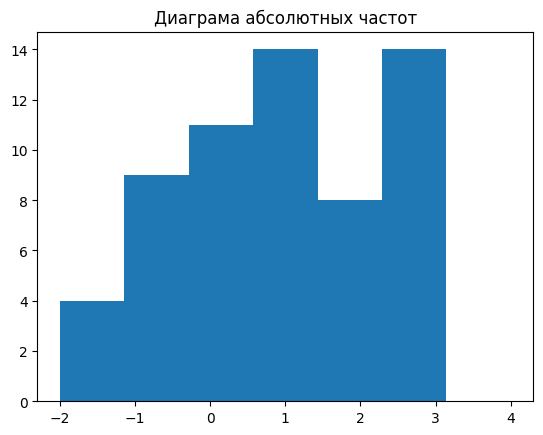

In [27]:
plt.title("Диаграма абсолютных частот")
plt.stairs(frequency, intervals, fill=True)

In [28]:
my_pdf = frequency/(h*n)
for i in range(0, len(my_pdf)):
    print(f'{i+1} interval: {my_pdf[i]}')
# print(f'Сумма абсолютных частот {tmp.sum()}')

1 interval: 0.07777777777777778
2 interval: 0.17500000000000002
3 interval: 0.2138888888888889
4 interval: 0.27222222222222225
5 interval: 0.15555555555555556
6 interval: 0.27222222222222225
7 interval: 0.0


[0.07777778 0.175      0.21388889 0.27222222 0.15555556 0.27222222
 0.        ]
1.1666666666666667


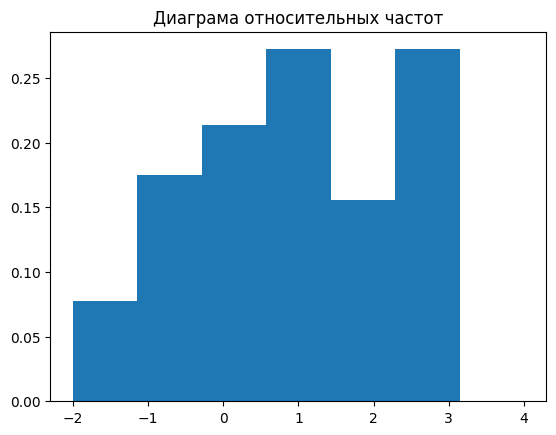

In [29]:
plt.title("Диаграма относительных частот")
plt.stairs(my_pdf, intervals, fill=True)
print(my_pdf)
print(my_pdf.sum())

Task 2

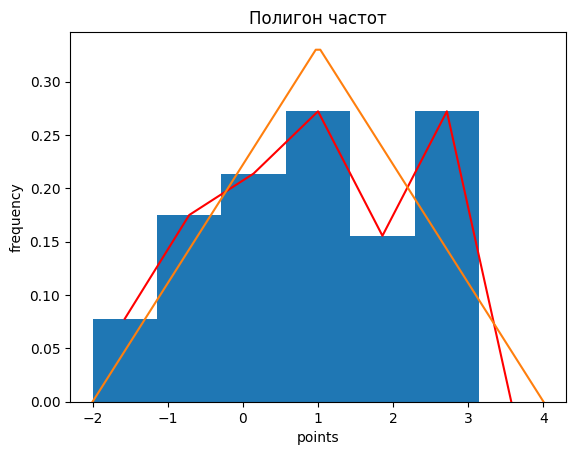

In [30]:
lineY = []
for i in my_pdf:
    lineY.append(i)
lineX = []
for i in range(0, len(intervals)-1):
    lineX.append(intervals[i]+h/2)
plt.stairs(my_pdf, intervals, fill=True)
plt.plot(lineX, lineY, color="red")

x = np.linspace(left, right, 100)
plt.plot(x, sts.triang.pdf(x, c=my_c, loc=my_loc, scale=my_scale))

plt.title('Полигон частот')
plt.xlabel('points')
plt.ylabel('frequency')
plt.show()

In [31]:
# check
proof = 0 
for i in frequency/n/h:
    proof+=i*h
print("Сумма площадей под графиком: ", proof)

Сумма площадей под графиком:  1.0


Function graph

In [32]:
arrayGraph = []
tmp1= frequency/n
for i in range(0, len(tmp1)):
    arrayGraph.append(0)
    for j in range (0, i):
        arrayGraph[i]+=tmp1[j]
cdfY = []
for i in arrayGraph:
    cdfY.append(i)
cdfY.append(1)
cdfX = []
for i in intervals:
    cdfX.append(i)


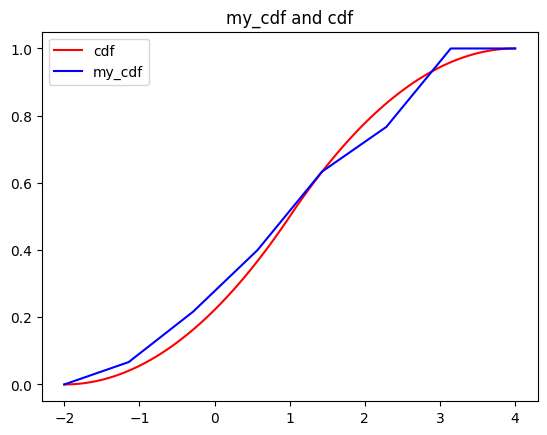

In [33]:
# fig, ax = plt.subplots()
# for i in range(0, len(arrayGraph)):
#     ax.hlines(y=arrayGraph[i], xmin=intervals[i], xmax=intervals[i+1], linewidth=2, color='r')
    
# ax.hlines(y=1, xmin=intervals[len(intervals)-1], xmax=intervals[len(intervals)-1]+10, linewidth=2, color='r')
# ax.hlines(y=0, xmin=intervals[0]-10, xmax=intervals[0], linewidth=2, color='r')
# plt.plot(x, sts.norm.cdf(x, a, sigma))
# ---------------------------------------------------

x = np.linspace(left, right, 100)
plt.plot(x, sts.triang.cdf(x, c=my_c, loc=my_loc, scale=my_scale), color="red")

plt.plot(cdfX, cdfY, color="blue")
plt.legend(['cdf', 'my_cdf'])
plt.title("my_cdf and cdf")
plt.show()

,X
0.25,-0.122560
0.50,0.782889
0.75,2.013568


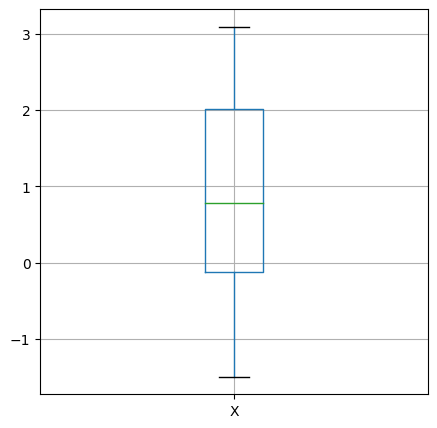

In [34]:
df = pd.DataFrame(data=sample,columns=['X'])
df.boxplot(figsize = (5, 5))
df.quantile([0.25,0.5,0.75])

part 3


In [35]:
print(q)
print(f"Вероятность по lib {sts.triang.cdf(mode +(q*sigma), c=my_c, loc=my_loc, scale=my_scale)-sts.triang.cdf(mode -(q*sigma), c=my_c, loc=my_loc, scale=my_scale)}")
prob = 0
for i in sample:
    if i>-q and i<q:
        prob+=1
prob/=n
print(f"Статистическая {prob}")


1.75
Вероятность по lib 1.0
Статистическая 0.7


part 4

In [36]:
tem1 = frequency/n
sample 

my_mean = statistics.mean(sample)
my_variacne = statistics.variance(sample)
my_dev = math.sqrt(my_variacne)
my_skewness = sts.skew(sample)
my_kurtosis = sts.kurtosis(sample)
print(f'mean - {my_mean}, \nvariacne - {my_variacne}, \ndev - {my_dev}, \nSkewness - {my_skewness}, \nKurtosis - {my_kurtosis}')


mean - 0.9315665808246276, 
variacne - 1.6307527542935225, 
dev - 1.2770093007858332, 
Skewness - -0.032182887562381204, 
Kurtosis - -1.0506949187881016


In [37]:
X = sample.sum()/len(sample)
print(f'Первый эмпирический момент: {X}')
s2 = 0
for i in sample:
    s2 += (i-X)**2
s2 = s2/len(sample)
print(f'Эмпирическая дисперсия: {s2}')
print(f'Стандартное отклонение: {math.sqrt(s2)}')
print(f'S^2: {(s2)*len(sample)/(len(sample)-1)}')


x4 = 0
s3 = 0
s4 = 0
for i in sample:
    x4 += math.pow(i, 4)
    s3 += math.pow((i-X), 3)
    s4 += math.pow((i-X), 4)
x4 /= len(sample)
s3 /= len(sample)
s4 /= len(sample)
print(f'Коэффициент ассимметрии: {s3/math.pow(math.sqrt(s2), 3)}')
print(f'Коэффициент эксцесса: {s4/math.pow(s2, 2)-3}')

Первый эмпирический момент: 0.9315665808246276
Эмпирическая дисперсия: 1.6035735417219634
Стандартное отклонение: 1.2663228426124056
Коэффициент ассимметрии: -0.032182887562381315
Коэффициент эксцесса: -1.050694918788101
